In [40]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py
import pickle
import astropy.units as u
import astropy.constants as c
import numpy as np

import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

sys.path.append(os.environ['DH_DIR'])

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [24]:
data_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/pbh_test'
f0 = data_dir + '/Fid/LightCones/LightCone_z5.0_HIIDIM=32_BOXLEN=256_fisher_DM_0_r54321.h5'
f1 = data_dir + '/Mass_0/LightCones/LightCone_z5.0_HIIDIM=32_BOXLEN=256_fisher_DM_1_r54321.h5'
f2 = data_dir + '/Mass_0/LightCones/LightCone_z5.0_HIIDIM=32_BOXLEN=256_fisher_DM_2_r54321.h5'


with h5py.File(f0, 'r') as hf:
    l0 = hf['lightcones']['brightness_temp'][()]
with h5py.File(f1, 'r') as hf:
    l1 = hf['lightcones']['brightness_temp'][()]
with h5py.File(f2, 'r') as hf:
    l2 = hf['lightcones']['brightness_temp'][()]
lc0 = p21c.LightCone.read(f0)
z_s = lc0.lightcone_redshifts

In [20]:
data_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/elecdecay'
f0 = data_dir + '/Mass0/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5'
f1 = data_dir + '/Mass0/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5'
f2 = data_dir + '/Mass0/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5'


with h5py.File(f0, 'r') as hf:
    l0 = hf['lightcones']['brightness_temp'][()]
with h5py.File(f1, 'r') as hf:
    l1 = hf['lightcones']['brightness_temp'][()]
with h5py.File(f2, 'r') as hf:
    l2 = hf['lightcones']['brightness_temp'][()]
lc0 = p21c.LightCone.read(f0)
z_s = lc0.lightcone_redshifts

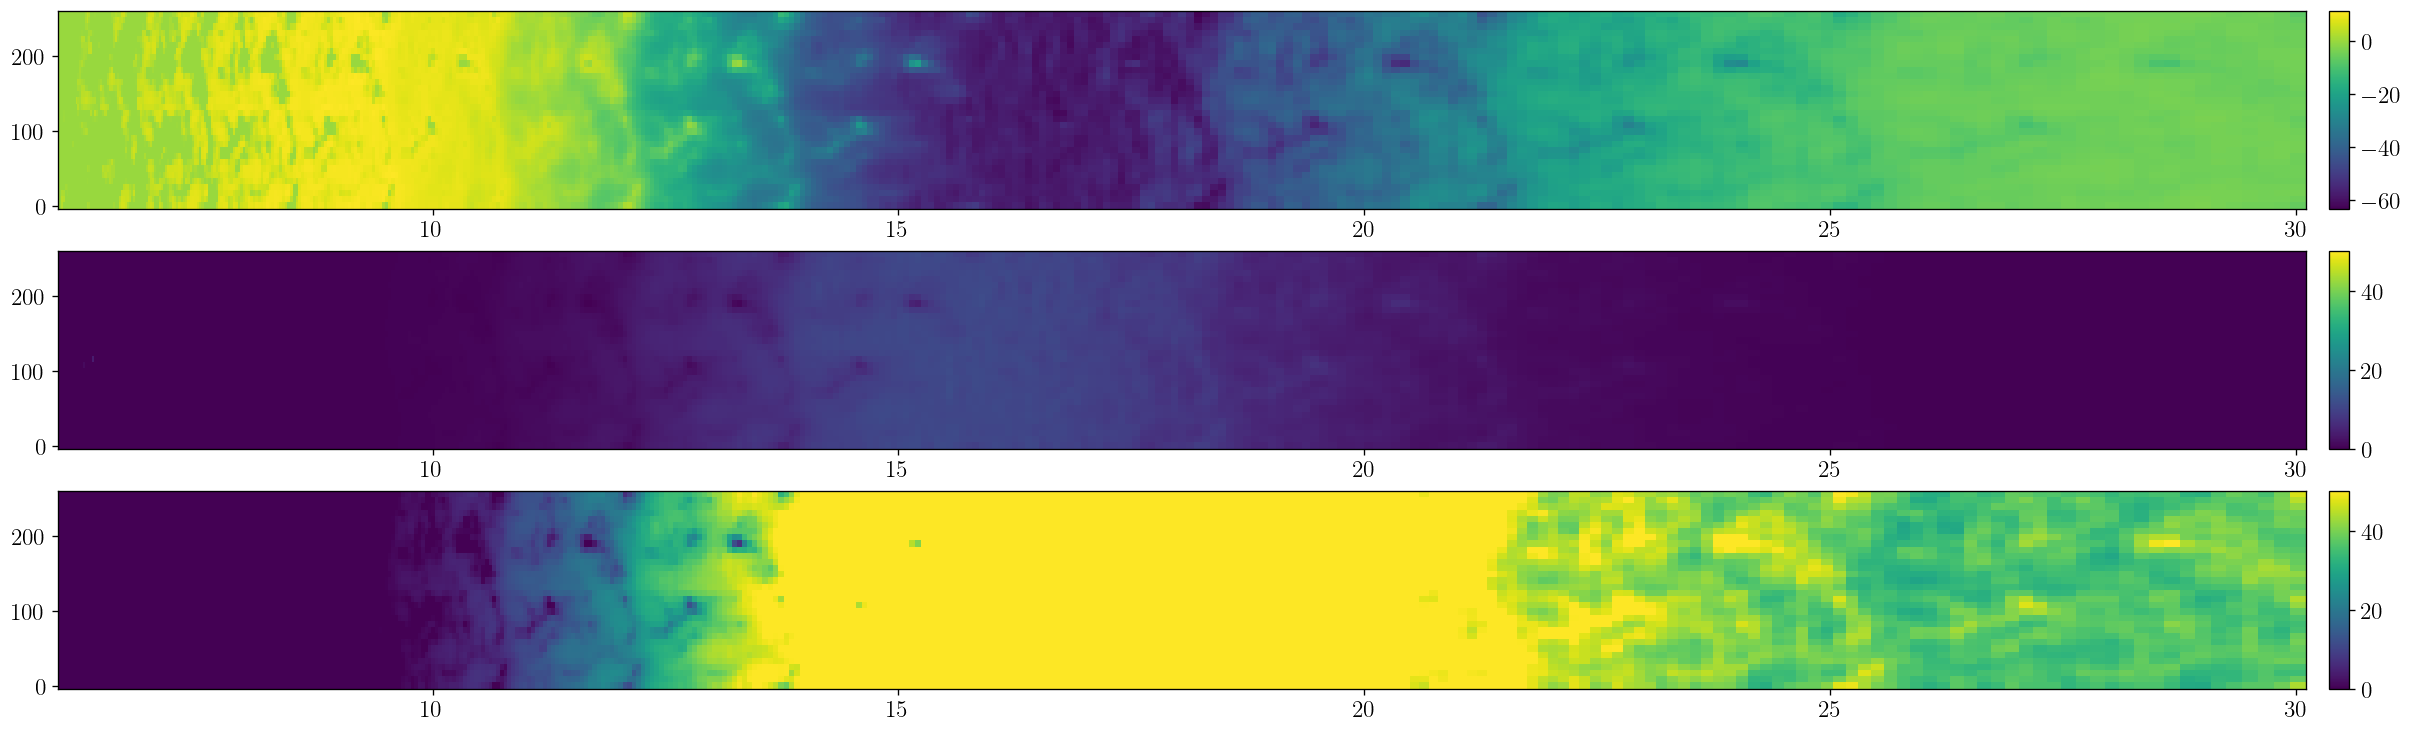

In [26]:
x_s = np.linspace(0, 256, l0.shape[0])
z_start = 6.
z_end = 30.
i_z_start = np.argmin(np.abs(z_s-z_start)) - 1
i_z_end = np.argmin(np.abs(z_s-z_end)) + 1
z_s_plot = z_s[i_z_start:i_z_end]
lcplot_0 = l0[:,0,i_z_start:i_z_end]
lcplot_1 = l1[:,0,i_z_start:i_z_end] - lcplot_0
lcplot_2 = l2[:,0,i_z_start:i_z_end] - lcplot_0

fig, axs = plt.subplots(3, 1, figsize=(20, 6), sharey='col', layout='constrained')

ax = axs[0]
im = ax.pcolormesh(z_s_plot, x_s, lcplot_0)
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01, orientation='vertical')

ax = axs[1]
im = ax.pcolormesh(z_s_plot, x_s, lcplot_1, vmin=0, vmax=50)
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01, orientation='vertical')

ax = axs[2]
im = ax.pcolormesh(z_s_plot, x_s, lcplot_2, vmin=0, vmax=50)
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01, orientation='vertical')

In [49]:
dhs = [
    pickle.load(open(os.environ['P21C_CACHE_DIR'] + '/pbh_test_F/dh_init_soln.p', 'rb')),
    pickle.load(open(os.environ['P21C_CACHE_DIR'] + '/pbh_test_M0D0/dh_init_soln.p', 'rb')),
    pickle.load(open(os.environ['P21C_CACHE_DIR'] + '/pbh_test_M0D1/dh_init_soln.p', 'rb')),
]

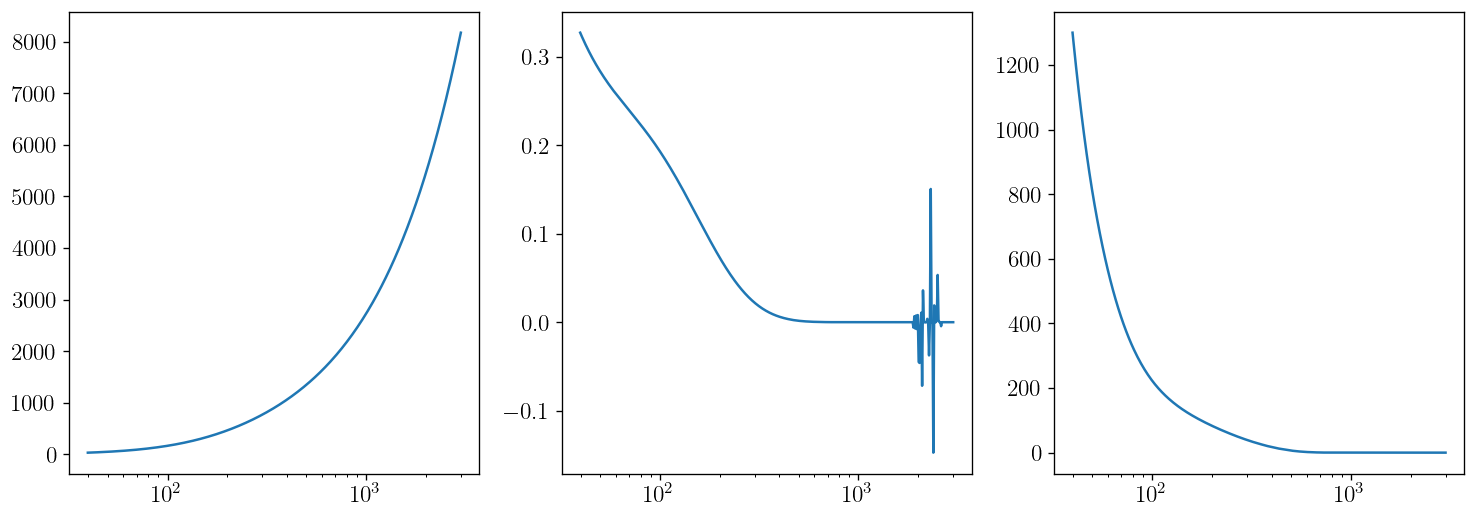

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    ax = axs[i]
    conversion = (u.eV / u.K / c.k_B).decompose().value
    if i == 0:
        plot_value = dhs[i]['Tm']
    else:
        plot_value = dhs[i]['Tm'] - dhs[0]['Tm']
    ax.plot(dhs[i]['rs']-1, plot_value*  conversion)
    ax.set(xscale='log')

In [88]:
from dm21cm.injections.pbh import PBHInjection
from dm21cm.injections.decay import DMDecayInjection
from dm21cm.utils import load_h5_dict

In [59]:
os.environ['DM21CM_DATA_DIR']

'/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data'

In [60]:
abscs = load_h5_dict(os.environ['DM21CM_DATA_DIR'] + '/tf/zf002/data/abscissas.h5')

In [61]:
inj1 = PBHInjection(m_PBH=1e15, f_PBH=1e-9)
inj2 = PBHInjection(m_PBH=1e15, f_PBH=2e-9)
inj1.set_binning(abscs)
inj2.set_binning(abscs)

In [76]:
print(inj1.inj_power(z=99), inj2.inj_power(z=99))
print(inj1.inj_power(z=9), inj2.inj_power(z=9))

print(inj1.inj_rate(z=99), inj2.inj_rate(z=99))
print(inj1.inj_rate(z=9), inj2.inj_rate(z=9))

4.809438688418494e-20 9.618877376836989e-20
4.809484808196375e-23 9.61896961639275e-23
2.241624888559022e-48 4.483249777118044e-48
2.2416248885590222e-51 4.4832497771180445e-51


[(100.0, 10000000000.0), (1e-38, 1e-33)]

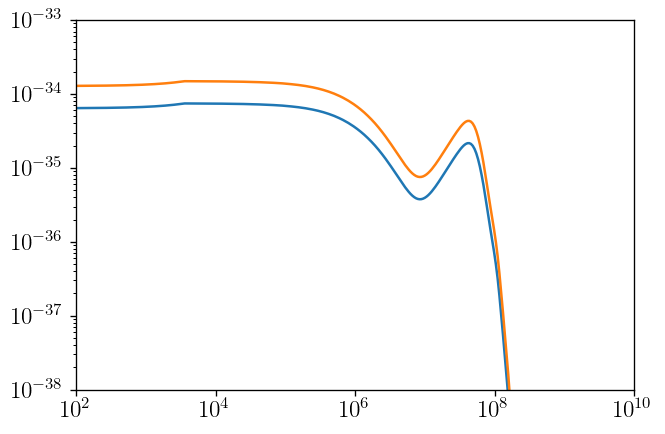

In [72]:
s1 = inj1.inj_elec_spec(z=100)
s2 = inj2.inj_elec_spec(z=100)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(s1.eng, s1.dNdE)
ax.plot(s2.eng, s2.dNdE)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e10), ylim=(1e-38, 1e-33))

In [80]:
inj1.inj_rate(z=100)

2.3095483643072488e-48

[(100.0, 10000000000.0), (10000000000.0, 1000000000000000.0)]

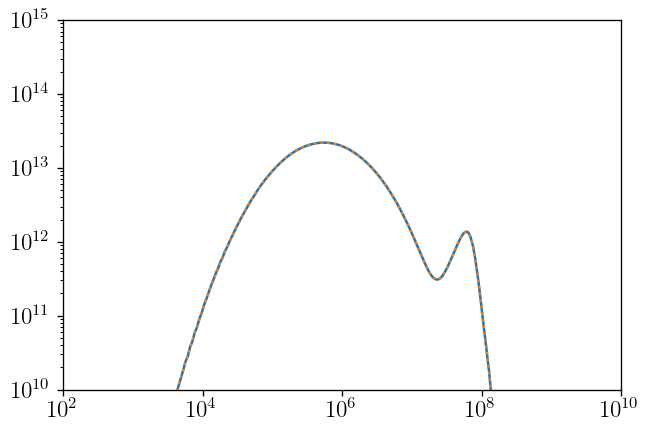

In [85]:
s1 = inj1.inj_phot_spec(z=100) / inj1.inj_rate(z=100)
s2 = inj2.inj_phot_spec(z=100) / inj2.inj_rate(z=100)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(s1.eng, s1.dNdE)
ax.plot(s2.eng, s2.dNdE, ':')
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e10), ylim=(1e10,1e15))

[(100.0, 10000000000.0), (10000000000.0, 1000000000000000.0)]

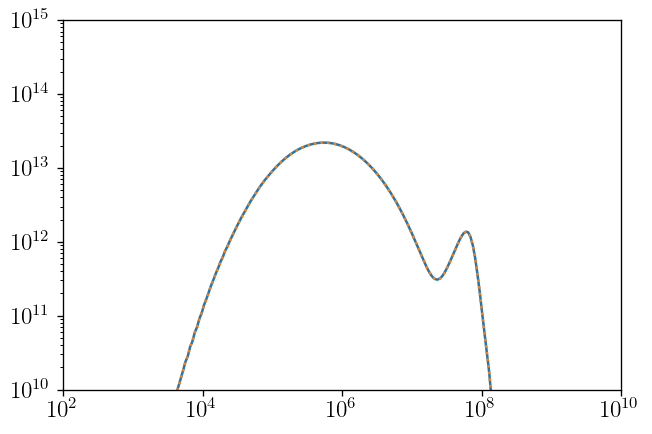

In [86]:
s1 = inj1.inj_phot_spec(z=10) / inj1.inj_rate(z=10)
s2 = inj2.inj_phot_spec(z=10) / inj2.inj_rate(z=10)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(s1.eng, s1.dNdE)
ax.plot(s2.eng, s2.dNdE, ':')
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e10), ylim=(1e10, 1e15))

In [89]:
DMDecayInjection?

Init signature: DMDecayInjection(primary=Ellipsis, m_DM=Ellipsis, lifetime=Ellipsis)
Docstring:     
Dark matter decay injection object. See parent class for details.

Args:
    primary (str): Primary injection channel. See darkhistory.pppc.get_pppc_spec
    m_DM (float): DM mass in [eV].
    lifetime (float, optional): Decay lifetime in [s].
File:           ~/dm21cm/DM21cm/dm21cm/injections/decay.py
Type:           type
Subclasses:     

In [97]:
pbh_inj = PBHInjection(m_PBH=1e15, f_PBH=1e-9)
pbh_inj.set_binning(abscs)
dec_inj = DMDecayInjection(primary='phot_delta', m_DM=1e8, lifetime=1e28)

z_s = np.linspace(5, 100, 30)
pbh_inj_s = np.array([pbh_inj.inj_power(z) for z in z_s])
dec_inj_s = np.array([dec_inj.inj_power(z) for z in z_s])

[]

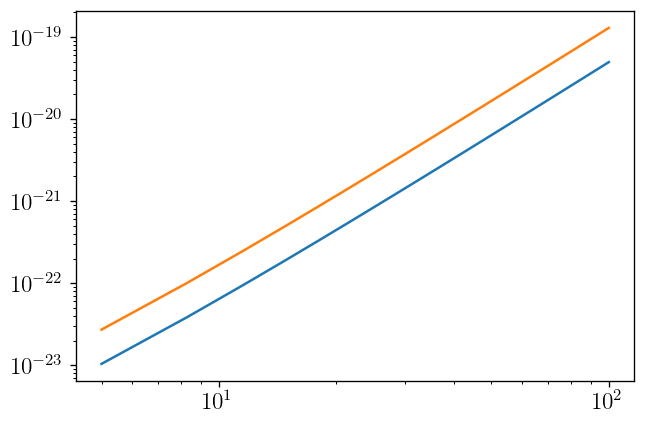

In [98]:
plt.plot(z_s, pbh_inj_s, label='PBH')
plt.plot(z_s, dec_inj_s, label='Decay')
plt.loglog()

## 1. Check DarkHistory

### 1.1 Default injection API

In [87]:
sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH

In [100]:
m_DM = 1e8 # [eV]
lifetime = 1e25 # [s]

In [103]:
# DM API of DarkHistory
default_kwargs = dict(
    DM_process='decay',
    mDM=m_DM,
    primary='elec_delta',
    lifetime=lifetime,
    start_rs=3000, end_rs=5, coarsen_factor=10, verbose=1,
    clean_up_tf=True,
) # default parameters use case B coefficients

soln = evolve_DH(**default_kwargs)

[2024-03-13 14:11:58,419] INFO: darkhistory.config: Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1


[2024-03-13 14:12:02,990] INFO: darkhistory.config: Loaded deposition transfer functions.
[2024-03-13 14:12:03,877] INFO: darkhistory.config: Loaded ICS transfer functions.
100%|██████████| 640/640 [02:12<00:00,  4.84it/s]


In [105]:
injection = DMDecayInjection(primary='elec_delta', m_DM=m_DM, lifetime=lifetime)
injection.set_binning(abscs)
default_kwargs = dict(
    in_spec_phot = lambda rs: injection.inj_phot_spec(rs-1) / injection.inj_rate(rs-1), # [phot / inj]
    in_spec_elec = lambda rs: injection.inj_elec_spec(rs-1) / injection.inj_rate(rs-1), # [elec / inj]
    rate_func_N   = lambda rs: injection.inj_rate(rs-1), # [inj / pcm^3 s]
    rate_func_eng = lambda rs: injection.inj_power(rs-1), # [eV / pcm^3 s]
    start_rs = 3000, end_rs = 5, coarsen_factor = 10, verbose = 1,
    clean_up_tf = True,
) # default parameters use case B coefficients

soln_new = evolve_DH(**default_kwargs)

[2024-03-13 14:16:02,893] INFO: darkhistory.config: Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1
[2024-03-13 14:16:09,712] INFO: darkhistory.config: Loaded deposition transfer functions.
[2024-03-13 14:16:11,175] INFO: darkhistory.config: Loaded ICS transfer functions.
100%|██████████| 640/640 [02:10<00:00,  4.91it/s]


In [114]:
injection = PBHInjection(m_PBH=1e15, f_PBH=2e-10)
injection.set_binning(abscs)
default_kwargs = dict(
    in_spec_phot = lambda rs: injection.inj_phot_spec(rs-1) / injection.inj_rate(rs-1), # [phot / inj]
    in_spec_elec = lambda rs: injection.inj_elec_spec(rs-1) / injection.inj_rate(rs-1), # [elec / inj]
    rate_func_N   = lambda rs: injection.inj_rate(rs-1), # [inj / pcm^3 s]
    rate_func_eng = lambda rs: injection.inj_power(rs-1), # [eV / pcm^3 s]
    start_rs = 3000, end_rs = 5, coarsen_factor = 10, verbose = 1,
    clean_up_tf = True,
) # default parameters use case B coefficients

soln_pbh = evolve_DH(**default_kwargs)

[2024-03-13 14:26:19,455] INFO: darkhistory.config: Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1
[2024-03-13 14:26:24,179] INFO: darkhistory.config: Loaded deposition transfer functions.
[2024-03-13 14:26:25,044] INFO: darkhistory.config: Loaded ICS transfer functions.
100%|██████████| 640/640 [02:22<00:00,  4.48it/s]


In [115]:
inj_decay = DMDecayInjection(primary='elec_delta', m_DM=1e8, lifetime=1e25)
inj_pbh = PBHInjection(m_PBH=1e15, f_PBH=2e-10)
inj_decay.set_binning(abscs)
inj_pbh.set_binning(abscs)

print(inj_decay.inj_power(100), inj_pbh.inj_power(100))
print(inj_decay.inj_rate(100), inj_pbh.inj_rate(100))

print(inj_decay.inj_power(30), inj_pbh.inj_power(30))
print(inj_decay.inj_rate(30), inj_pbh.inj_rate(30))

print(inj_decay.inj_power(10), inj_pbh.inj_power(10))
print(inj_decay.inj_rate(10), inj_pbh.inj_rate(10))

1.2955616184353153e-16 9.910338951200321e-21
1.2955616184353154e-24 4.619096728614498e-49
3.7460971283932055e-18 2.8655644603344857e-22
3.7460971283932056e-26 1.3356049411012364e-50
1.6736783853819468e-19 1.280283158636379e-23
1.6736783853819468e-27 5.9672054533441174e-52


[]

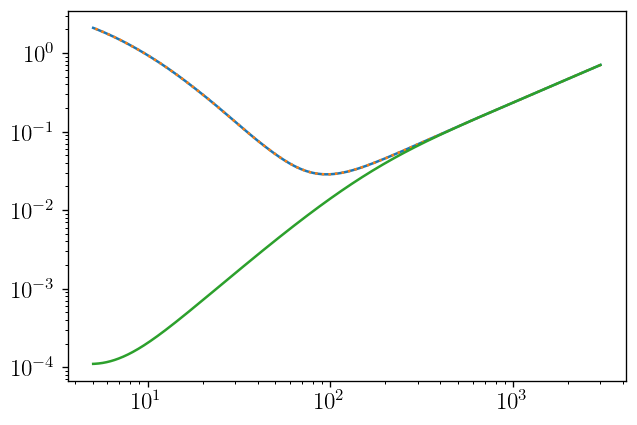

In [116]:
plt.plot(soln['rs'], soln['Tm'])
plt.plot(soln_new['rs'], soln_new['Tm'], ':')
plt.plot(soln_pbh['rs'], soln_pbh['Tm'])
plt.loglog()